In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('initial_results.csv')

In [16]:
df.loc[df['N_sample'] == 4999,'N_sample'] += 1

In [19]:
df.head()

,Name,N_sample,Dim,Size (GB),mpts,is_initial_kNNG_connected,is_new_kNNG_connected,Time_myMethod,Time_exact_HDBSCAN,ARI_myMethod,HAI_myMethod,Time_app_HDBSCAN,ARI_APP_HDBSCAN,HAI_APP_HDBSCAN
0,beans,13611.0,16.0,0.001742,10.0,True,True,6.280849,8.331952,0.984025,0.988050,3.859642,0.984693,0.988559
1,beans,13611.0,16.0,0.001742,10.0,True,True,7.317165,7.646866,0.984025,0.988026,3.917816,0.984693,0.988555
2,beans,13611.0,16.0,0.001742,10.0,True,True,6.487807,7.930719,0.984025,0.988068,3.855009,0.984009,0.988552
3,beans,13611.0,16.0,0.001742,10.0,True,True,8.298974,7.955826,0.984025,0.988057,4.133602,0.984693,0.988558
4,beans,13611.0,16.0,0.001742,10.0,True,True,6.474461,8.085247,0.984025,0.988079,3.870161,0.984009,0.988558


In [41]:
thresh = 5e3
ds_name = 'gamma'
(df[(df['N_sample'] > thresh) &(df['Name'] == ds_name)].groupby(['Name','N_sample','Dim','mpts']).mean()[['Time_myMethod','Time_exact_HDBSCAN','Time_app_HDBSCAN',
                                                     'ARI_myMethod','HAI_myMethod','ARI_APP_HDBSCAN',
                                                    'HAI_APP_HDBSCAN']] - df[df['Name'] == ds_name].groupby(['Name','N_sample','Dim',
                                                    'mpts']).std()[['Time_myMethod','Time_exact_HDBSCAN','Time_app_HDBSCAN',
                                                     'ARI_myMethod','HAI_myMethod','ARI_APP_HDBSCAN',
                                                    'HAI_APP_HDBSCAN']] ).dropna(axis=0)



Time_myMethod  Time_exact_HDBSCAN  Time_app_HDBSCAN  \
Name  N_sample Dim  mpts                                                        
gamma 10000.0  2.0  10.0       4.392343            4.378011          1.108284   
                    20.0       6.613970            4.413961          1.110424   
                    30.0       8.886371            4.367436          1.125096   
               10.0 10.0       4.709030            4.379058          1.940681   
                    20.0       6.869624            4.408675          1.938557   
                    30.0       9.437258            4.429513          1.918290   
               32.0 10.0       4.905379            4.385778          3.805238   
                    20.0       7.079015            4.278372          3.792449   
                    30.0       9.607860            4.464688          3.798320   
               64.0 10.0       4.979177            4.390357          6.820972   
                    20.0       7.435442            4.468257          6.807086   
                    30.0      10.083950            4.420239          6.817609   

                          ARI_myMethod  HAI_myMethod  ARI_APP_HDBSCAN  \
Name  N_sample Dim  mpts                                                
gamma 10000.0  2.0  10.0      0.999903      0.997575         0.999903   
                    20.0      1.000000      0.998649         1.000000   
                    30.0      0.999903      0.999033         0.999857   
               10.0 10.0      1.000000      0.997986         1.000000   
                    20.0      1.000000      0.999064         1.000000   
                    30.0      1.000000      0.999413         1.000000   
               32.0 10.0      1.000000      0.997123         1.000000   
                    20.0      1.000000      0.998935         1.000000   
                    30.0      1.000000      0.999390         1.000000   
               64.0 10.0      1.000000      0.996896         1.000000   
                    20.0      1.000000      0.998916         1.000000   
                    30.0      1.000000      0.999411         1.000000   

                          HAI_APP_HDBSCAN  
Name  N_sample Dim  mpts                   
gamma 10000.0  2.0  10.0         0.997630  
                    20.0         0.998649  
                    30.0         0.999054  
               10.0 10.0         0.998478  
                    20.0         0.999206  
                    30.0         0.999460  
               32.0 10.0         0.998597  
                    20.0         0.999283  
                    30.0         0.999504  
               64.0 10.0         0.998654  
                    20.0         0.999284  
                    30.0         0.999511

In [3]:
df.head()

,Name,N_sample,Dim,Size (GB),mpts,is_initial_kNNG_connected,is_new_kNNG_connected,ARI,HAI
0,standart,5000.0,2.0,0.00008,10.0,False,True,0.998381,0.999125
1,standart,5000.0,2.0,0.00008,10.0,False,True,1.000000,0.974686
2,standart,5000.0,2.0,0.00008,10.0,False,True,0.998681,0.998982
3,standart,5000.0,2.0,0.00008,10.0,False,True,1.000000,0.999006
4,standart,5000.0,2.0,0.00008,10.0,False,True,1.000000,0.998657


In [58]:
def plot_train(df,name):
    


    
    colors = ['red','green','blue','orange']
    
    methods = ['ivfflat','ivfpq']
    
    fig = plt.figure(figsize=[7,5])

    dims = {2:[10,20,30],10:[10,20,30],32:[10,20,30], 64:[10,20,30]}
    for index,key in enumerate(dims):

        aux =  df[ (df['Name'] == 'standart') & (df['N_sample'] == 5000) & (df['Dim'] == key) & (df['mpts'] < 25)].groupby(['N_sample','Dim','mpts']).mean()
        aris = aux['ARI'].values
        print(aris)
        plt.plot(dims[key][0:2],aris,
            label=f"DIM = {key}",marker='o',markersize=8,color=colors[index],markerfacecolor='black',
            markeredgecolor='black',linestyle='-'
        )


    


    
    plt.legend(loc ="lower right")
    plt.title(f'ARI x mpts for multiple dimensions')
    plt.ylabel("Adjusted Rand Index - (ARI)")
    plt.xlabel('mpts')

    
    plt.grid('on')

    plt.show()

[0.99963257 0.99797187]
[0.96622185 1.        ]
[1. 1.]
[0.96619533 1.        ]


/tmp/ipykernel_5387/3854546124.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux =  df[ (df['Name'] == 'standart') & (df['N_sample'] == 5000) & (df['Dim'] == key) & (df['mpts'] < 25)].groupby(['N_sample','Dim','mpts']).mean()
/tmp/ipykernel_5387/3854546124.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux =  df[ (df['Name'] == 'standart') & (df['N_sample'] == 5000) & (df['Dim'] == key) & (df['mpts'] < 25)].groupby(['N_sample','Dim','mpts']).mean()
/tmp/ipykernel_5387/3854546124.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, 

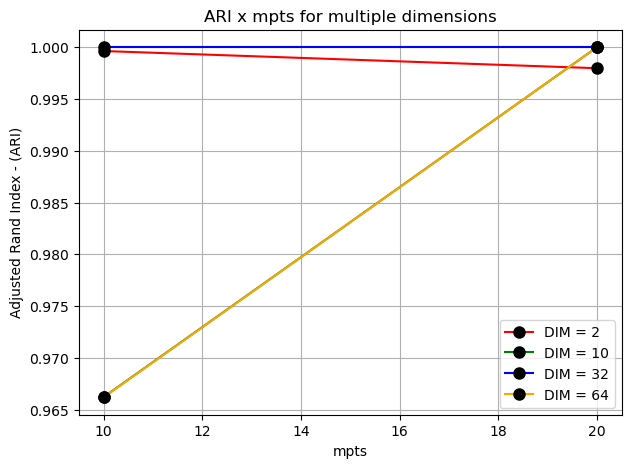

In [59]:
plot_train(df,'name')